In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [27]:
data = pd.read_csv('./dataset/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features].copy()
Y = data['Survived']

X['Sex'] = X['Sex'].map({'male':0, 'female':1})
X['Embarked'] = X['Embarked'].map({'S': 0, 'C':1, 'Q':2})

X['Age'].fillna(X['Age'].median())
X['Fare'].fillna(X['Fare'].median())
X['Embarked'].fillna(X['Embarked'].mode()[0])

0      2
1      0
2      2
3      0
4      0
      ..
413    0
414    1
415    0
416    0
417    1
Name: Embarked, Length: 418, dtype: int64

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [24]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

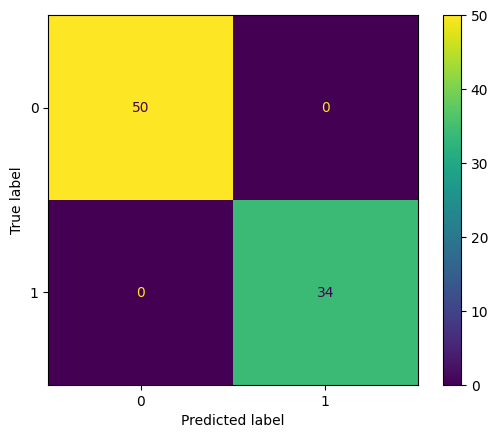

In [25]:
Y_pred = clf.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]).plot()
plt.show()


In [16]:
accuracy = np.mean(Y_pred == Y_test)
accuracy

1.0

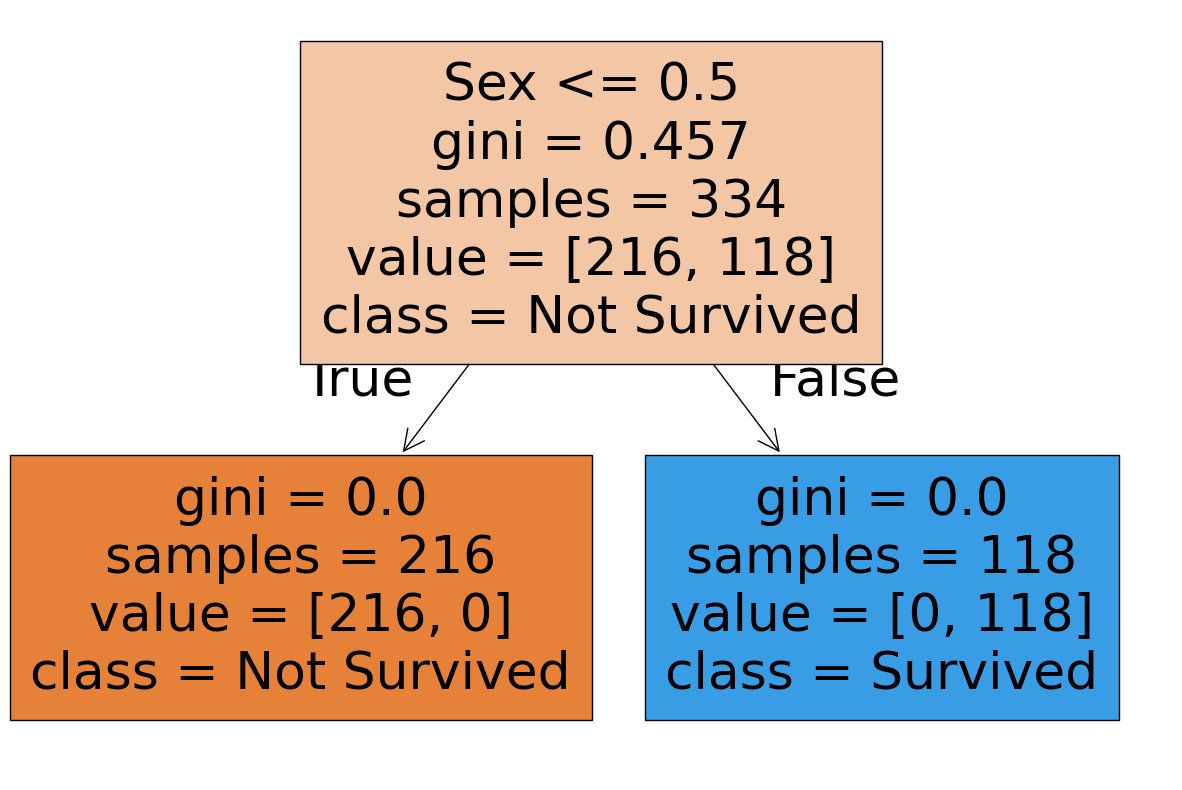

In [13]:
plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

### Manually

In [26]:
import pandas as pd
import numpy as np
data = pd.read_csv('./dataset/loan_data.csv')
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [27]:
features= ['person_age','person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file']
X = data[features].copy()
y = data['loan_status'].values

In [28]:
data['person_gender'] = data['person_gender'].map({'male':0, 'female':1})
data['previous_loan_defaults_on_file'] = data['previous_loan_defaults_on_file'].map({'No':0, 'Yes':1})

for col in ['person_education', 'person_home_ownership', 'loan_intent']:
    unique_values = data[col].unique()
    val_map = {val: idx for idx, val in enumerate(unique_values)}
    data[col] = data[col].map(val_map)

X = X.values
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,1,0,71948.0,0,0,35000.0,0,16.02,0.49,3.0,561,0,1
1,21.0,1,1,12282.0,0,1,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,1,1,12438.0,3,2,5500.0,2,12.87,0.44,3.0,635,0,1
3,23.0,1,2,79753.0,0,0,35000.0,2,15.23,0.44,2.0,675,0,1
4,24.0,0,0,66135.0,1,0,35000.0,2,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,0,3,47971.0,6,0,15000.0,2,15.66,0.31,3.0,645,0,1
44996,37.0,1,3,65800.0,17,0,9000.0,4,14.07,0.14,11.0,621,0,1
44997,33.0,0,3,56942.0,7,0,2771.0,5,10.02,0.05,10.0,668,0,1
44998,29.0,0,2,33164.0,4,0,12000.0,1,13.23,0.36,6.0,604,0,1


In [29]:
missing = data[data.isnull().any(axis=1)]
missing

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


In [ ]:
def gini_impurity(y):
    classes, counts = np.unique(y, return_counts=True)
    probs = counts / counts.sum()
    return 1 - np.sum(probs ** 2)